# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [6]:
app_train['DAYS_BIRTH_YEARS'] = app_train['DAYS_BIRTH']/365

In [8]:
app_train['DAYS_BIRTH_YEARS'].describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH_YEARS, dtype: float64

In [9]:
app_train['BIRTH_YEARS_CUT'] = pd.cut(app_train['DAYS_BIRTH_YEARS'],bins=np.linspace(20,70,11))
app_train['BIRTH_YEARS_CUT']

0         (25.0, 30.0]
1         (45.0, 50.0]
2         (50.0, 55.0]
3         (50.0, 55.0]
4         (50.0, 55.0]
5         (45.0, 50.0]
6         (35.0, 40.0]
7         (50.0, 55.0]
8         (55.0, 60.0]
9         (35.0, 40.0]
10        (25.0, 30.0]
11        (55.0, 60.0]
12        (35.0, 40.0]
13        (35.0, 40.0]
14        (35.0, 40.0]
15        (20.0, 25.0]
16        (35.0, 40.0]
17        (25.0, 30.0]
18        (45.0, 50.0]
19        (30.0, 35.0]
20        (50.0, 55.0]
21        (40.0, 45.0]
22        (30.0, 35.0]
23        (65.0, 70.0]
24        (30.0, 35.0]
25        (50.0, 55.0]
26        (50.0, 55.0]
27        (40.0, 45.0]
28        (25.0, 30.0]
29        (25.0, 30.0]
              ...     
307481    (55.0, 60.0]
307482    (35.0, 40.0]
307483    (65.0, 70.0]
307484    (35.0, 40.0]
307485    (30.0, 35.0]
307486    (40.0, 45.0]
307487    (60.0, 65.0]
307488    (25.0, 30.0]
307489    (45.0, 50.0]
307490    (25.0, 30.0]
307491    (30.0, 35.0]
307492    (55.0, 60.0]
307493    (

In [10]:
Target0 = app_train.loc[app_train['TARGET'] == 0 , 'BIRTH_YEARS_CUT']
Target1 = app_train.loc[app_train['TARGET'] == 1 , 'BIRTH_YEARS_CUT']

1         (45.0, 50.0]
2         (50.0, 55.0]
3         (50.0, 55.0]
4         (50.0, 55.0]
5         (45.0, 50.0]
6         (35.0, 40.0]
7         (50.0, 55.0]
8         (55.0, 60.0]
9         (35.0, 40.0]
10        (25.0, 30.0]
11        (55.0, 60.0]
12        (35.0, 40.0]
13        (35.0, 40.0]
14        (35.0, 40.0]
15        (20.0, 25.0]
16        (35.0, 40.0]
17        (25.0, 30.0]
18        (45.0, 50.0]
19        (30.0, 35.0]
20        (50.0, 55.0]
21        (40.0, 45.0]
22        (30.0, 35.0]
23        (65.0, 70.0]
24        (30.0, 35.0]
25        (50.0, 55.0]
27        (40.0, 45.0]
28        (25.0, 30.0]
29        (25.0, 30.0]
30        (40.0, 45.0]
31        (30.0, 35.0]
              ...     
307478    (50.0, 55.0]
307479    (35.0, 40.0]
307480    (25.0, 30.0]
307482    (35.0, 40.0]
307483    (65.0, 70.0]
307484    (35.0, 40.0]
307485    (30.0, 35.0]
307486    (40.0, 45.0]
307487    (60.0, 65.0]
307488    (25.0, 30.0]
307490    (25.0, 30.0]
307491    (30.0, 35.0]
307492    (

In [15]:
import seaborn as sns

/Users/Apple/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


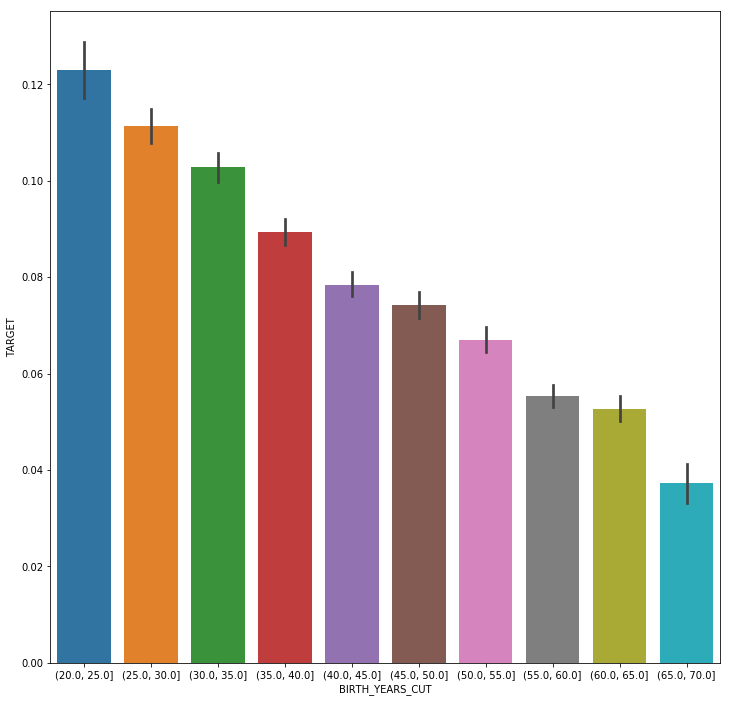

In [16]:
plt.figure(figsize=(12,12))

sns.barplot(x=app_train['BIRTH_YEARS_CUT'],y=app_train['TARGET'])
plt.show()